In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import blip_analysis as ba
import exp_blip_models as em
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from copy import deepcopy
from sklearn.cluster import OPTICS, KMeans
from scipy import stats
from tqdm import trange
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import dask
from scipy.stats import poisson
from sklearn.metrics import adjusted_rand_score
from daskify import Daskified
from label_axes import label_axes
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

b


In [2]:
glyphs = ba.get_glyphs()

In [3]:
preds = np.load('../Fig6/230614_all_preds_limit.npy')

In [4]:
y_true = [i for _ in range(100) for i in range(32)]
cms = [confusion_matrix(i.flatten(), y_true, labels=range(32), normalize='true') for i in preds]

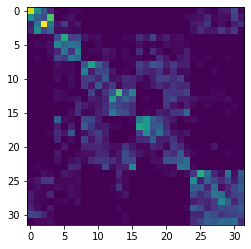

In [19]:
plt.imshow(cms[4])

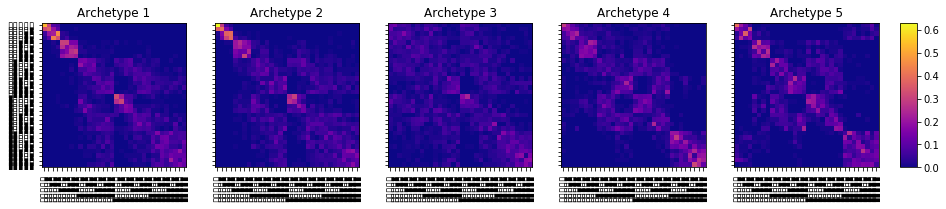

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
vmax = np.max([np.max(i) for i in cms])
for i in range(5):
    ax[i].imshow(cms[i], vmax=vmax, cmap='plasma')
    ax[i].set_xticks(range(32))
    ax[i].set_yticks(range(32))
    ax[i].set_xticklabels(glyphs, rotation=90)
    ax[i].set_yticklabels([]);
    ax[i].set_ylim(31.5, -0.5)
    ax[i].set_title('Archetype {}'.format(i+1))
ax[0].set_yticklabels(glyphs);
pos = ax[-1].get_position()
cbax = fig.add_axes([0.92, pos.y0, 0.015, pos.height])
cb = fig.colorbar(ax[-1].get_images()[0], cax=cbax)
plt.savefig('230703_sup_archetype_cms.pdf', bbox_inches='tight')

In [41]:
### Loading archetypes
archetypes = np.load('../Fig6/230627_archetype_labels.npy')

In [43]:
print(adjusted_rand_score(archetypes[:130], archetypes[130:260]))
print(adjusted_rand_score(archetypes[:130], archetypes[260:390]))
print(adjusted_rand_score(archetypes[130:260], archetypes[260:390]))

0.12109608372387971
0.05845247858625511
0.1903828985446328
